# Smoothen Stock Price
Write a function named `smoothen_price`. Given the historical stock price data (represented by a 1D numpy array) and a window size (an integer) as inputs, the function smoothens the stock price using a moving average filter. You can use the simple moving average filter. The function should plot the original stock price and smoothened stock price. Make sure your plot is clearly labeled. Do not use the built-in moving average filters. 

Test your function using the opening price of Tesla from "TSLA.csv" and window size 100. Here is the expected output:
![TSLA](assets/output.png)


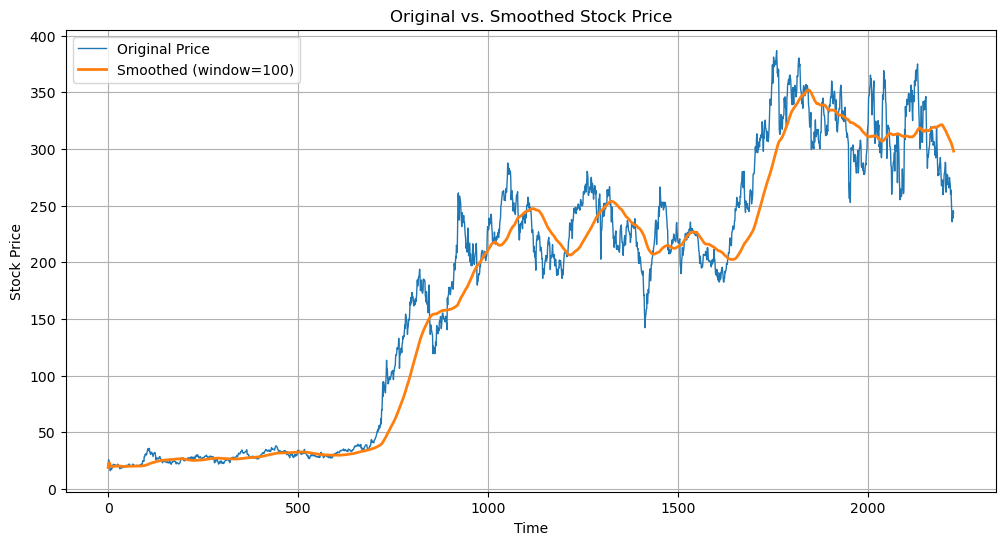

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def smoothen_price(data, window):
    
    if window <= 0:
        raise ValueError("Window size must be positive.")

    n = len(data)
    smoothed = np.zeros(n)

    # Simple moving average implemented manually
    for i in range(n):
        start = max(0, i - window + 1)
        smoothed[i] = np.mean(data[start:i+1])

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(data, label="Original Price", linewidth=1)
    plt.plot(smoothed, label=f"Smoothed (window={window})", linewidth=2)
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.title("Original vs. Smoothed Stock Price")
    plt.legend()
    plt.grid(True)
    plt.show()

    return smoothed

# Example usage
import pandas as pd

df = pd.read_csv("TSLA.csv")
tsla_open = df["Open"].values

smoothened = smoothen_price(tsla_open, window=100)



# Linear Regression

Write a program to accomplish the following goals:

- Load the "penguins.csv" data. 
- Remove all rows containing empty fields. 
- Fit a linear model to predict how body mass (dependent variable) of penguins is correlated to flipper length (independent variable).
- Print out the mean squared error and $R^2$ value.
Choose the appropriate plot to compare the actual body mass and the predicted body mass. Clearly label your plot.

Mean Squared Error: 154546.19
R² Value: 0.7590


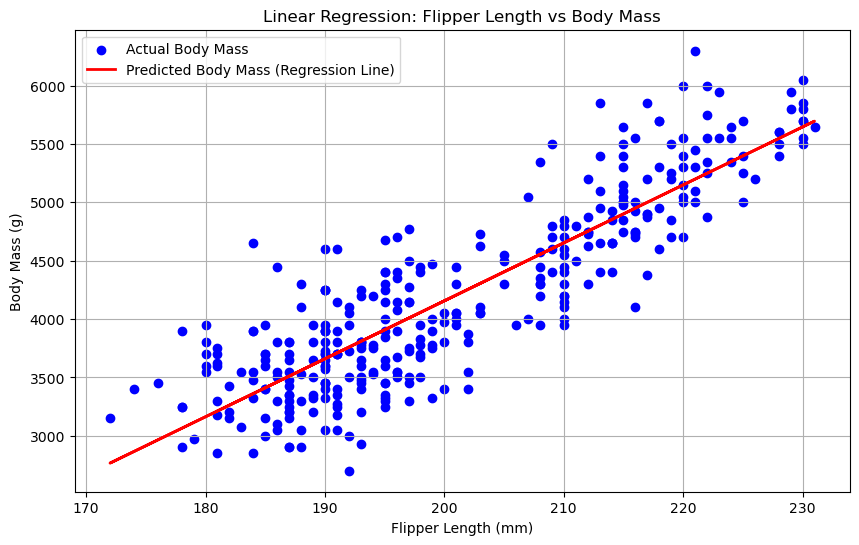

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the data
df = pd.read_csv("penguins.csv")

# 2. Remove rows with empty fields
df_clean = df.dropna(subset=["body_mass_g", "flipper_length_mm"])

# Extract independent (X) and dependent variable (y)
X = df_clean["flipper_length_mm"].values.reshape(-1, 1)
y = df_clean["body_mass_g"].values

# 3. Fit linear regression model

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# 4. Compute MSE and R²
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Value: {r2:.4f}")

# 5. Plot actual vs predicted body mass
plt.figure(figsize=(10,6))

plt.scatter(X, y, color="blue", label="Actual Body Mass")
plt.plot(X, y_pred, color="red", linewidth=2, label="Predicted Body Mass (Regression Line)")

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Linear Regression: Flipper Length vs Body Mass")
plt.legend()
plt.grid(True)
plt.show()


# Logistic Regression

We have discussed linear regression in class. In this problem, you will explore logistic regression. Specifically, you will preprocess the dataset using pandas for logistic regression. Different from linear regression, logistic regression considers binary dependent variables rather than continuous dependent variables. Logistic regression is widely-used to predict binary outcomes based on a set of features (independent variables). 

Write a program to accomplish the following:

- Load the "diabetes.csv" file using pandas.
- Extract the following columns as your independent variables: Glucose, BloodPressure, and BMI. Extract the top 75% rows as the features in training dataset named feature_train. For practice purpose, **do not use** the built-in dataset splitting function in this problem. In your future projects, you can use `train_test_split` from `sklearn.model_selection` to automatically split the dataset for you. 
- Extract the "Outcome" column as the dependent variable. Extract the top 75% rows as the labels in the training dataset, named outcome_train.  For practice purpose, do not use the built-in dataset splitting function in this problem.
- Keep the rest of data as your testing dataset. Let's name the features in testing dataset as `feature_test`
- Instantiate a logistic regression model named `logreg`. Fit the model using your training dataset. You can use the following code snippet:
    ```py
    logreg = LogisticRegression()
    logreg.fit(feature_train, outcome_train)
    ```

- Let's evaluate the quality of prediction. Test the learned model using `outcome_pred = logreg.predict(feature_test)`
Compare `outcome_pred` with the actual outcome in testing dataset, count the percentage of positive patients that are correctly predicted by your model. For practice purpose, do not use the built-in report/summary or confusion matrix for calculation. 
- Print out the false negative and false positive of your model. For practice purpose, do not use the built-in report/summary or confusion matrix for calculation. 

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# 1. Load the dataset
df = pd.read_csv("diabetes.csv")

# 2. Select independent variables
features = df[["Glucose", "BloodPressure", "BMI"]]

# 3. Select dependent variable
outcome = df["Outcome"]

# 4. Split manually (top 75% = training, bottom 25% = testing)
split_index = int(0.75 * len(df))

feature_train = features[:split_index]
feature_test  = features[split_index:]

outcome_train = outcome[:split_index]
outcome_test  = outcome[split_index:]


# 5. Instantiate and train model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(feature_train, outcome_train)

# 6. Predict using the model
outcome_pred = logreg.predict(feature_test)

# 7. Evaluate model performance manually

# Percentage of correctly predicted positives (accuracy on positives)
correct_positive = np.sum((outcome_pred == 1) & (outcome_test == 1))
actual_positive = np.sum(outcome_test == 1)
positive_accuracy = correct_positive / actual_positive if actual_positive > 0 else 0

# False negative = actual 1 but predicted 0
false_negative = np.sum((outcome_test == 1) & (outcome_pred == 0))

# False positive = actual 0 but predicted 1
false_positive = np.sum((outcome_test == 0) & (outcome_pred == 1))

# 8. Print results
print("Correctly Predicted Positives (%): {:.2f}%".format(positive_accuracy * 100))
print("False Negatives:", false_negative)
print("False Positives:", false_positive)


Correctly Predicted Positives (%): 51.43%
False Negatives: 34
False Positives: 11
